# <font color="purple">**Licenciatura en Tecnologías para la Información en Ciencias**</font>

## <font color="blue">**Procesamiento Digital de Imágenes**</font>

### <font color="blue">**Tareas 7: Operaciones Morfológicas**</font>

### Angélica Nayeli Rivas Bedolla:    418128734

### Semestre 2021-1

### Viernes 08 de enero de 2021

# Introducción

Las operaciones morfológicas son operaciones que se aplican a imágenes binarias que se basan en las formas de la imagen.
Se basan en la teoría de conjuntos (unión, diferencia, intersección) con el fin de conservar las características principales de las imágenes por medio de la simplificación de las formas que esta contiene.
Funciona con una imagen y un kernel, siendo los elementos principales de las operaciones morfológicas.

Sus operaciones básicas son:
 - Dilatación: Es el aumento de los bordes. Aumenta el tamaño de los objetos si la intersección del kernel y la imagen (en la región de interés) tiene almenos un 1, este se ubicará en el punto de origen de la región de interés, aumentando el tamaño de la figura original.
 - Erosión: Es la disminución del grosor. Disminuye el tamaño de los objetos si la intersección del kernel y la imagen (en la región de interés) tiene almenos un 0, este se ubicará en el punto de origen de la región de interés, disminuyendo el tamaño de la figura original.
 
Existen otras operaciones que se pueden llevar a cabo en base a estas operaciones básicas:
 - Apertura: Disminuye ruido baso en 1. Se aplica erosión enseguida de dilatación en la imagen, lo cual provoca que las pequeñas figuras iniciales (ruido basado en 1) desaparezcan y después recobre su tamaño original.
 - Cierre: Disminuye ruido baso en 0. Se aplica dilatación enseguida de erosión en la imagen, lo cual provoca que las pequeñas agujeros en las figuras (ruido basado en 0) desaparezcan y después recobre su tamaño original.

# Enunciado del problema



Implementar las funciones Dilatación y Erosión con los parámetros:
 - Nombre de la función: DilatarImagen(), ErosionImagen()
 - Argumentos: ImagenBinaria, Kernel (Uint8), iteraciones
 - Salida: Imagen dilatada, Imagen erosionada
 
Aplicar las operaciones con las imágenes _celulas.png_, _cuadros.png_, _holamundo.jpg_ y _silueta1.jpg_.

# Código fuente

## Librerías

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import cv2

## Funciones

In [2]:
def SubMatriz(img, coordenadas, k): #hecha en tarea 2
    """
    Recibe:
        img: imagen de cve que se puede tratar con numpy.
        coordenadas: tupla x,y que es el centro de la submatriz
        k: tamaño en x & en y de la submatriz. Siempre impar.
    Regresa: 
        submatriz de tamaño kxk con centro en coordenadas.
    """
    desplazamiento = k//2 #es el numero de unidades que se tendrá que desplazar las coordenadas para crear las esquinas de la nueva submatriz
    superior_izquierdo = (coordenadas[0]-desplazamiento, coordenadas[1]-desplazamiento) #la coordenada de la esquina superior izquierda (fila, columna)

    return img[superior_izquierdo[1]:superior_izquierdo[1]+k, superior_izquierdo[0]:superior_izquierdo[0]+k] #devuelvo el slice de la matriz

In [3]:
def Binarizar(img, umbral=100):
    """
    Recibe:
        img: imagen de cv2 
        umbral: umbral de binarizacion, Default 100.
    Devuelve: 
        imagen binarizada
    """
    img_out = np.zeros(img.shape)
    img_out[img <  umbral] = 0
    img_out[img >= umbral] = 1
    return img_out

In [4]:
def DilatarImagen(img, kernel=np.uint8(np.ones((3,3))), itera=1):
    """
    Recibe:
        img: imagen binaria 
        kernel: kernel cuadrado (Uint8). Default 3x3 completa.
        iter: numero de iteraciones. Default 1.
    Devuelve: 
        imagen diltada
    """
    tamanio = img.shape
    k = kernel.shape[0]
    
    img_out = np.zeros(tamanio)
    actual = img.copy()
    
    for _ in range(itera):
        for y in range(1, tamanio[0]-1):
            for x in range(1, tamanio[1]-1):
                sub_matriz = SubMatriz(actual, (x,y), k=k)
                dentro_kernel = sub_matriz*kernel
                if 1 in dentro_kernel: ##explicación debajo
                    img_out[y,x] = 1
                    
        actual = img_out.copy()

    #return img_out
    return actual

Al multiplicar elemento por elemento la sub matriz por el kernel, si algún elemento es cero su multiplicación será cero. Por ello, si en el resultado de la multiplicación hay un 1, significa que el área que cubre el kernel en la imagen tiene un 1 y por ello se reproduce ese uno en la posición actual.

In [5]:
def ErosionImagen(img, kernel=np.uint8(np.ones((3,3))), itera=1):
    """
    Recibe:
        img: imagen binaria 
        kernel: kernel cuadrado (Uint8). Default 3x3 completa.
        iter: numero de iteraciones. Default 1.
    Devuelve: 
        imagen erosionada
    """
    tamanio = img.shape
    k = kernel.shape[0]
    
    img_out = np.zeros(tamanio)
    actual = img.copy()
    
    for _ in range(itera):
        for y in range(1, tamanio[0]-1):
            for x in range(1, tamanio[1]-1):
                sub_matriz = SubMatriz(actual, (x,y), k=k)
                dentro_kernel = sub_matriz*kernel
                if 0 not in dentro_kernel[kernel==1]: ##explicación debajo
                    img_out[y,x] = 1
                    
        actual = img_out.copy()

    #return img_out
    return actual

La operación 
        
        [kernel == 1]

devuelve una matriz de verdadero y falso. Por ejemplo:

    array([[False,  True, False],
           [ True,  True,  True],
           [False,  True, False]])

Al hacer la operación

    dentro_kernel[kernel==1]
    
devuelve una lista de los elementos que están en $dentro\_kernel$ y son verdaderos. Por ejemplo:

    [0,1,1,1,1,1]
    
Así comprueba si todos los elementos de las posiciones del kernel son 1 y se reproduce ese 1 en la posición actual.

In [6]:
def AperturaImagen(img, kernel=np.uint8(np.ones((3,3))), itera=1):
    """
    Recibe:
        img: imagen binaria 
        kernel: kernel cuadrado (Uint8). Default 3x3 completa.
        iter: numero de iteraciones. Default 1.
    Devuelve: 
        imagen con transformacion de apertura
    """
    img_e = ErosionImagen(img, kernel=kernel, itera=itera)
    img_d = DilatarImagen(img_e, kernel=kernel, itera=itera)
    return img_d

In [7]:
def CierreImagen(img, kernel=np.uint8(np.ones((3,3))), itera=1):
    """
    Recibe:
        img: imagen binaria 
        kernel: kernel cuadrado (Uint8). Default 3x3 completa.
        iter: numero de iteraciones. Default 1.
    Devuelve: 
        imagen con transformacion de cierre
    """
    img_d = DilatarImagen(img, kernel=kernel, itera=itera)
    img_e = ErosionImagen(img_d, kernel=kernel, itera=itera)
    return img_e

## Ejecuciones

Kernel de cruz, tache y cuadrado de 3x3 para todas las ejecuciones para obtener conclusiones con factores comunes.

In [8]:
kernel_cruz = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]
                  ])

In [9]:
kernel_cuadrado = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]
                  ])

In [10]:
kernel_tache = np.array([[1,0,1],
                   [0,1,0],
                   [1,0,1]
                  ])

### Celulas

In [11]:
img = cv2.imread('celulas.png', 0)
img_binarizada = Binarizar(img, 70)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f24e4730080>,
 Text(0.5,1,'Binarizada'))

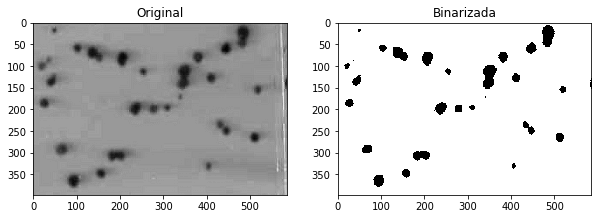

In [12]:
figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img, 'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(img_binarizada*255, 'gray'),plt.title('Binarizada')

Kernel cruz

In [13]:
img_dilatada = DilatarImagen(img_binarizada, kernel=kernel_cruz, itera=5)
img_erosionada = ErosionImagen(img_binarizada, kernel=kernel_cruz, itera=5)
img_apertura = AperturaImagen(img_binarizada, kernel=kernel_cruz, itera=5)
img_cierre = CierreImagen(img_binarizada, kernel=kernel_cruz, itera=5)

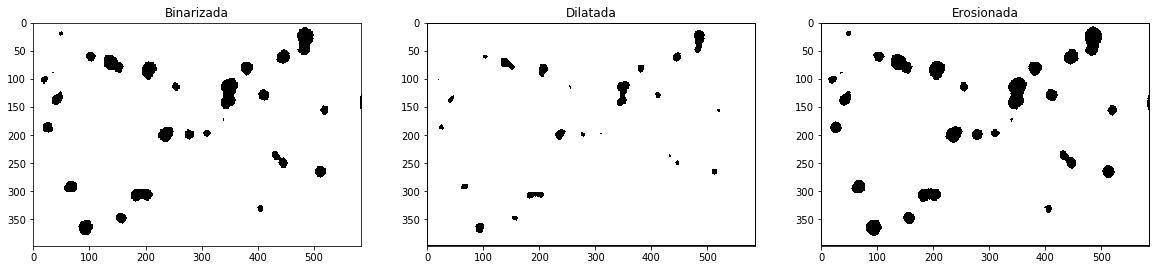

In [14]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_dilatada*255, 'gray'),plt.title('Dilatada')
plt.subplot(133),plt.imshow(img_erosionada*255, 'gray'),plt.title('Erosionada')
plt.show()

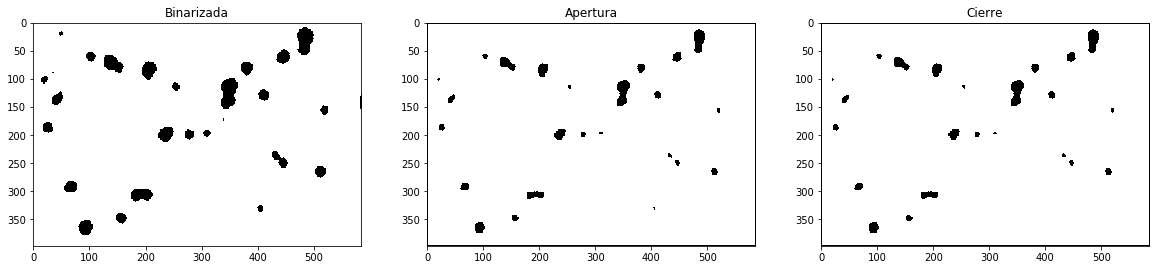

In [15]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_apertura*255, 'gray'),plt.title('Apertura')
plt.subplot(133),plt.imshow(img_cierre*255, 'gray'),plt.title('Cierre')
plt.show()

Kernel cuadrado

In [16]:
img_dilatada = DilatarImagen(img_binarizada, kernel=kernel_cuadrado, itera=5)
img_erosionada = ErosionImagen(img_binarizada, kernel=kernel_cuadrado, itera=5)
img_apertura = AperturaImagen(img_binarizada, kernel=kernel_cuadrado, itera=5)
img_cierre = CierreImagen(img_binarizada, kernel=kernel_cuadrado, itera=5)

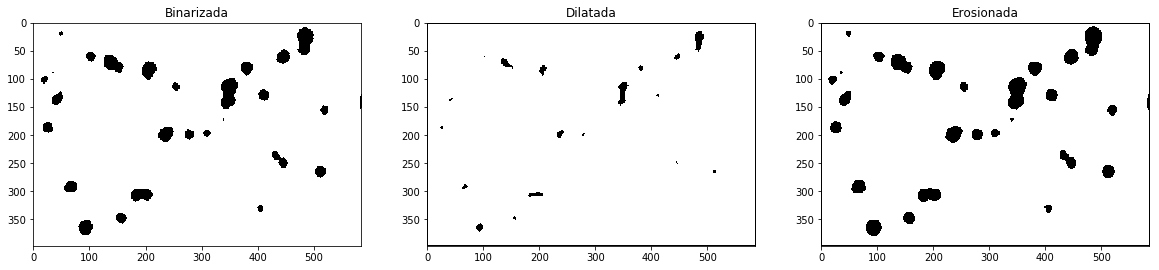

In [17]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_dilatada*255, 'gray'),plt.title('Dilatada')
plt.subplot(133),plt.imshow(img_erosionada*255, 'gray'),plt.title('Erosionada')
plt.show()

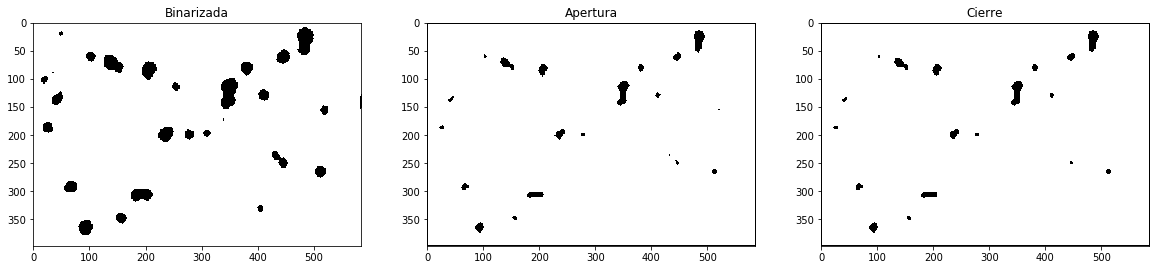

In [18]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_apertura*255, 'gray'),plt.title('Apertura')
plt.subplot(133),plt.imshow(img_cierre*255, 'gray'),plt.title('Cierre')
plt.show()

Kernel tache

In [19]:
img_dilatada = DilatarImagen(img_binarizada, kernel=kernel_tache, itera=5)
img_erosionada = ErosionImagen(img_binarizada, kernel=kernel_tache, itera=5)
img_apertura = AperturaImagen(img_binarizada, kernel=kernel_tache, itera=5)
img_cierre = CierreImagen(img_binarizada, kernel=kernel_tache, itera=5)

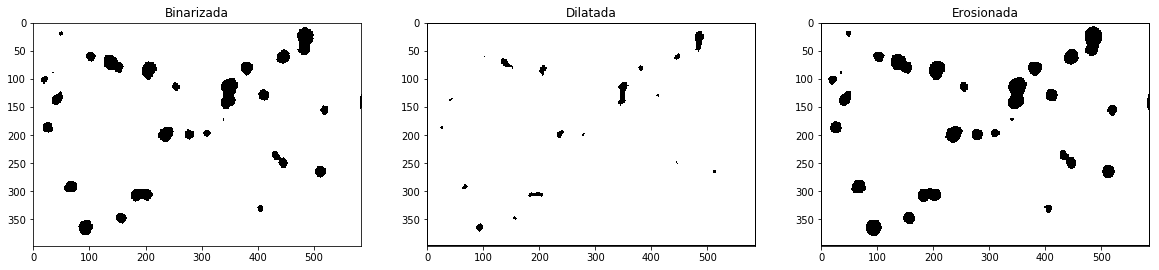

In [20]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_dilatada*255, 'gray'),plt.title('Dilatada')
plt.subplot(133),plt.imshow(img_erosionada*255, 'gray'),plt.title('Erosionada')
plt.show()

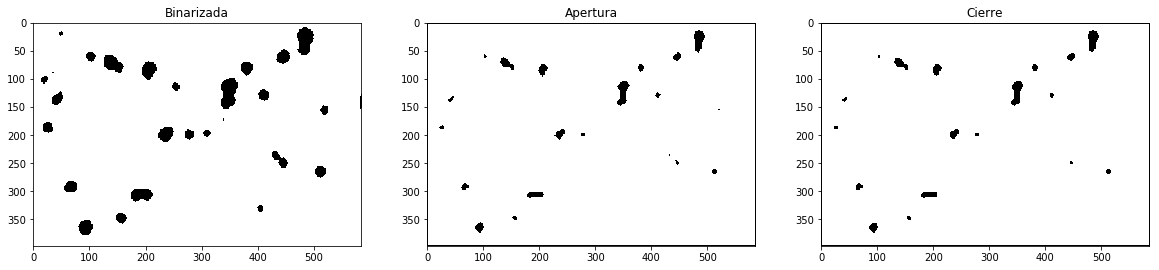

In [21]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_apertura*255, 'gray'),plt.title('Apertura')
plt.subplot(133),plt.imshow(img_cierre*255, 'gray'),plt.title('Cierre')
plt.show()

No tiene caso aplicar dilatación o cierre, ya que lo importante aquí son las partes negras, no blancas. Aquí no hay ruido dentro de las células (no hay blanco dentro de las figuras negras) así que no hay necesitas de aplicar apertura. La única operación razonable a hacer es erosión y resulta mejor cuando se usa un kernel cuadrado, ya que guarda mejor la estructura de las figuras.

### Cuadros

In [25]:
img = cv2.imread('cuadros.png', 0)
img_binarizada = Binarizar(img, 254)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f246a8ac2e8>,
 Text(0.5,1,'Binarizada'))

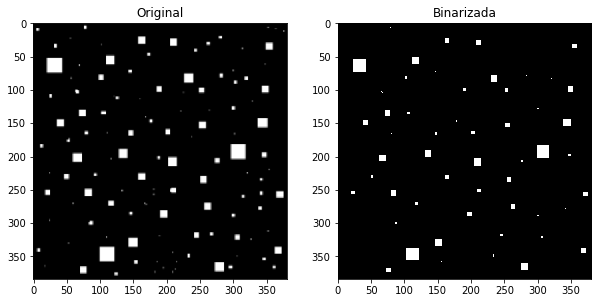

In [26]:
figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img, 'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(img_binarizada*255, 'gray'),plt.title('Binarizada')

Kernel cruz

In [27]:
img_dilatada = DilatarImagen(img_binarizada, kernel=kernel_cruz, itera=5)
img_erosionada = ErosionImagen(img_binarizada, kernel=kernel_cruz, itera=5)
img_apertura = AperturaImagen(img_binarizada, kernel=kernel_cruz, itera=5)
img_cierre = CierreImagen(img_binarizada, kernel=kernel_cruz, itera=5)

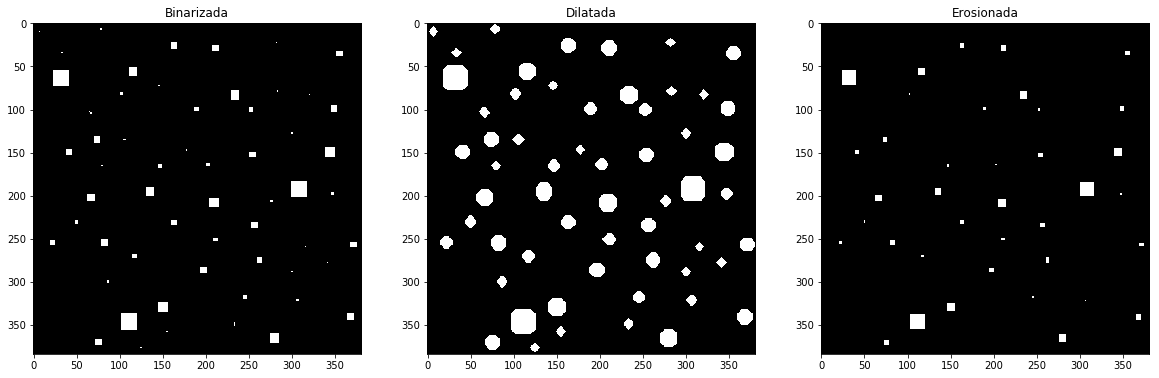

In [28]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_dilatada*255, 'gray'),plt.title('Dilatada')
plt.subplot(133),plt.imshow(img_erosionada*255, 'gray'),plt.title('Erosionada')
plt.show()

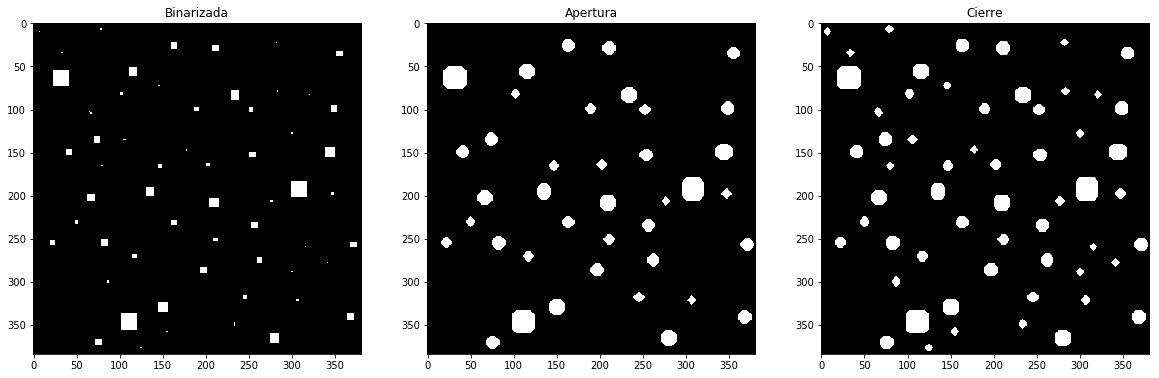

In [29]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_apertura*255, 'gray'),plt.title('Apertura')
plt.subplot(133),plt.imshow(img_cierre*255, 'gray'),plt.title('Cierre')
plt.show()

Kernel cuadrado

In [30]:
img_dilatada = DilatarImagen(img_binarizada, kernel=kernel_cuadrado, itera=5)
img_erosionada = ErosionImagen(img_binarizada, kernel=kernel_cuadrado, itera=5)
img_apertura = AperturaImagen(img_binarizada, kernel=kernel_cuadrado, itera=5)
img_cierre = CierreImagen(img_binarizada, kernel=kernel_cuadrado, itera=5)

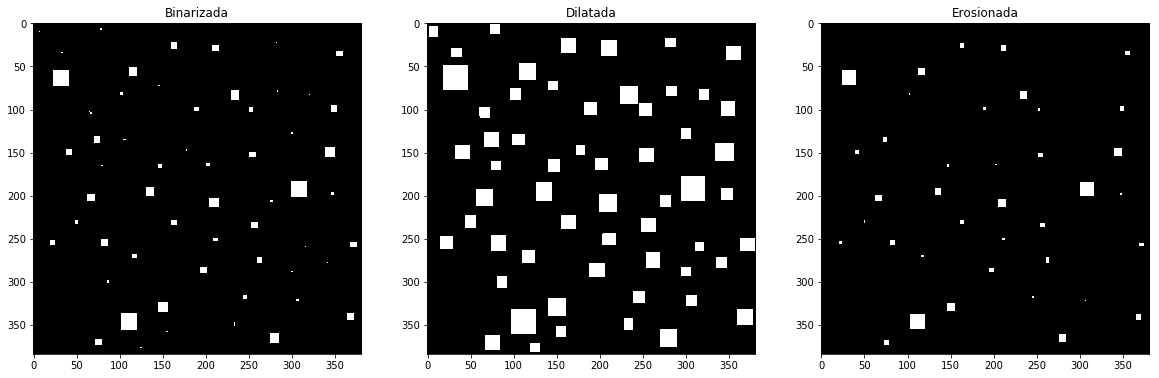

In [31]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_dilatada*255, 'gray'),plt.title('Dilatada')
plt.subplot(133),plt.imshow(img_erosionada*255, 'gray'),plt.title('Erosionada')
plt.show()

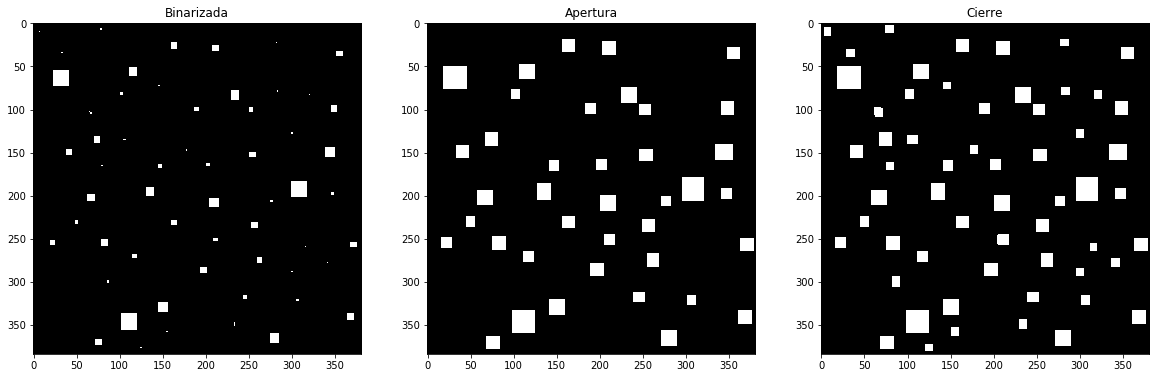

In [32]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_apertura*255, 'gray'),plt.title('Apertura')
plt.subplot(133),plt.imshow(img_cierre*255, 'gray'),plt.title('Cierre')
plt.show()

Kernel tache

In [39]:
img_dilatada = DilatarImagen(img_binarizada, kernel=kernel_tache, itera=5)
img_erosionada = ErosionImagen(img_binarizada, kernel=kernel_tache, itera=5)
img_apertura = AperturaImagen(img_binarizada, kernel=kernel_tache, itera=5)
img_cierre = CierreImagen(img_binarizada, kernel=kernel_tache, itera=5)

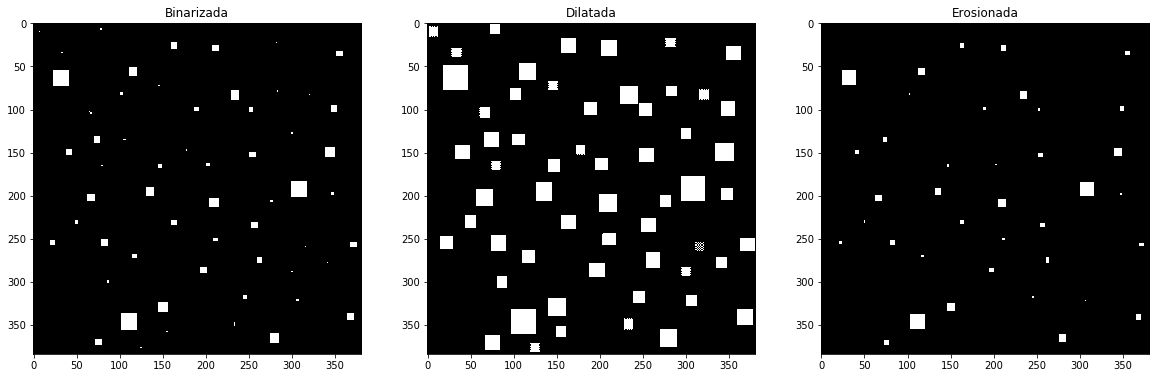

In [40]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_dilatada*255, 'gray'),plt.title('Dilatada')
plt.subplot(133),plt.imshow(img_erosionada*255, 'gray'),plt.title('Erosionada')
plt.show()

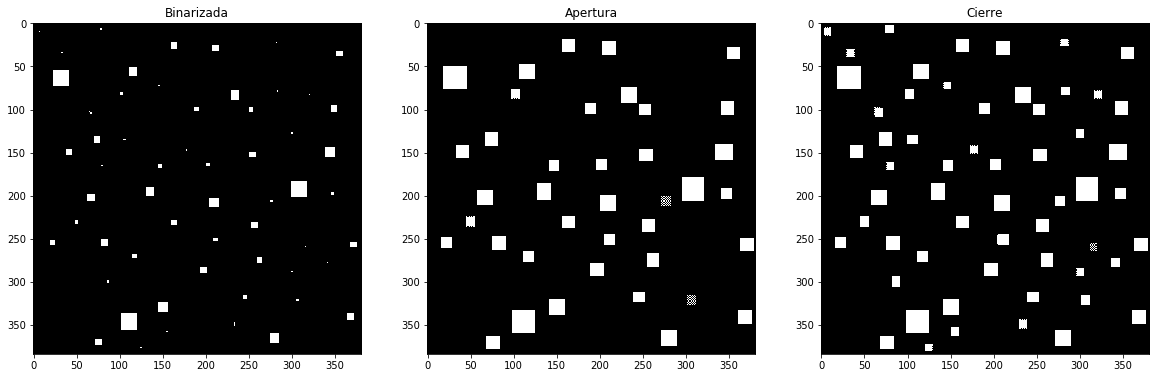

In [41]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_apertura*255, 'gray'),plt.title('Apertura')
plt.subplot(133),plt.imshow(img_cierre*255, 'gray'),plt.title('Cierre')
plt.show()

La dilatación por sí sola ayuda a resaltar los cuadros que son muy pequeños, pero al aplicar la operación de cierre agrega este mismo resalte más definición, ya que no parecen círculos (con solo dilatación) ya se asemejan más a cuadrados con esquinas redondeadas.

La erosión ayuda mucho a quitar el ruido sobre lo negro y perpetúa la definición de los cuadrados, en cambio, apertura ayudó a no tener tantos cuadros miniatura pero se perdió la forma de los cuadrados. 

El kernel que resultó mejor fue el cuadrado al replicar los pixeles de las esquinas que son ignorados en el de cruz y los de todo el borde que son ignorados por el de tache.

### HolaMundo

In [42]:
img = cv2.imread('holamundo.jpg', 0)
img_binarizada = Binarizar(img, 120)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f246aed9828>,
 Text(0.5,1,'Binarizada'))

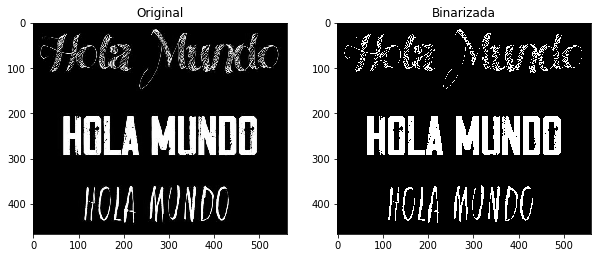

In [43]:
figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img, 'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(img_binarizada*255, 'gray'),plt.title('Binarizada')

Kernel cruz

In [44]:
img_dilatada = DilatarImagen(img_binarizada, kernel=kernel_cruz, itera=2)
img_erosionada = ErosionImagen(img_binarizada, kernel=kernel_cruz, itera=2)
img_apertura = AperturaImagen(img_binarizada, kernel=kernel_cruz, itera=2)
img_cierre = CierreImagen(img_binarizada, kernel=kernel_cruz, itera=2)

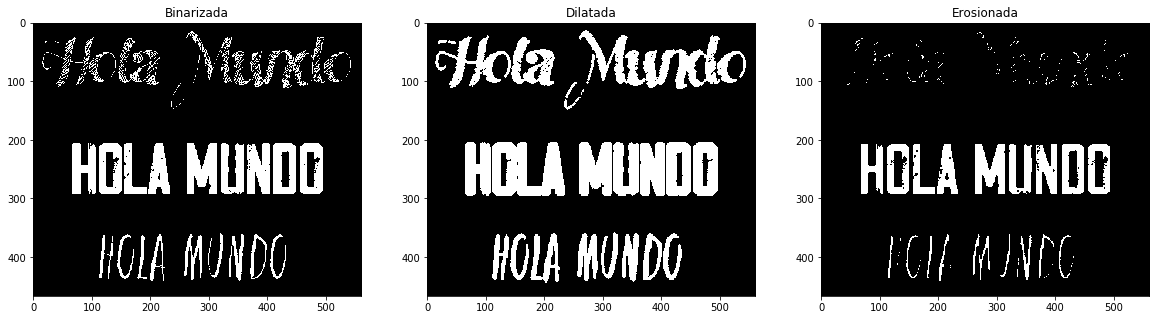

In [45]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_dilatada*255, 'gray'),plt.title('Dilatada')
plt.subplot(133),plt.imshow(img_erosionada*255, 'gray'),plt.title('Erosionada')
plt.show()

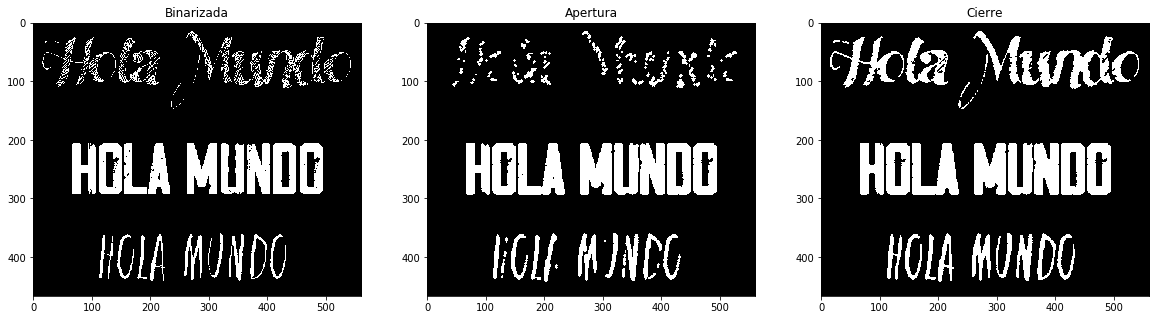

In [46]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_apertura*255, 'gray'),plt.title('Apertura')
plt.subplot(133),plt.imshow(img_cierre*255, 'gray'),plt.title('Cierre')
plt.show()

Kernel cuadrado

In [47]:
img_dilatada = DilatarImagen(img_binarizada, kernel=kernel_cuadrado, itera=2)
img_erosionada = ErosionImagen(img_binarizada, kernel=kernel_cuadrado, itera=2)
img_apertura = AperturaImagen(img_binarizada, kernel=kernel_cuadrado, itera=2)
img_cierre = CierreImagen(img_binarizada, kernel=kernel_cuadrado, itera=2)

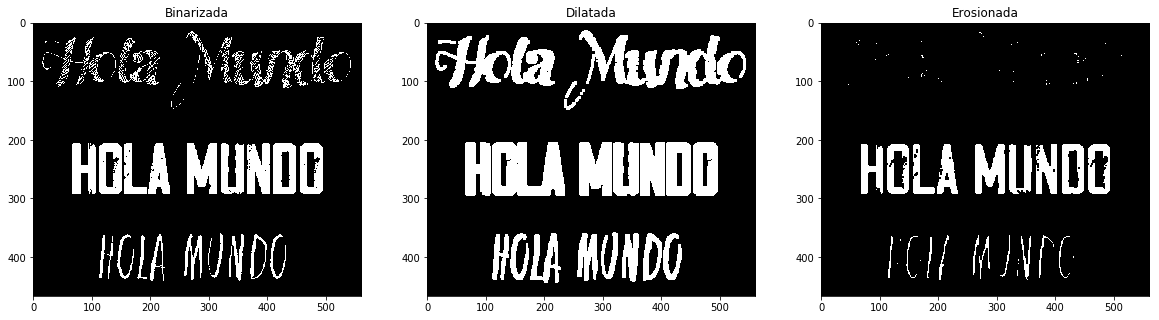

In [48]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_dilatada*255, 'gray'),plt.title('Dilatada')
plt.subplot(133),plt.imshow(img_erosionada*255, 'gray'),plt.title('Erosionada')
plt.show()

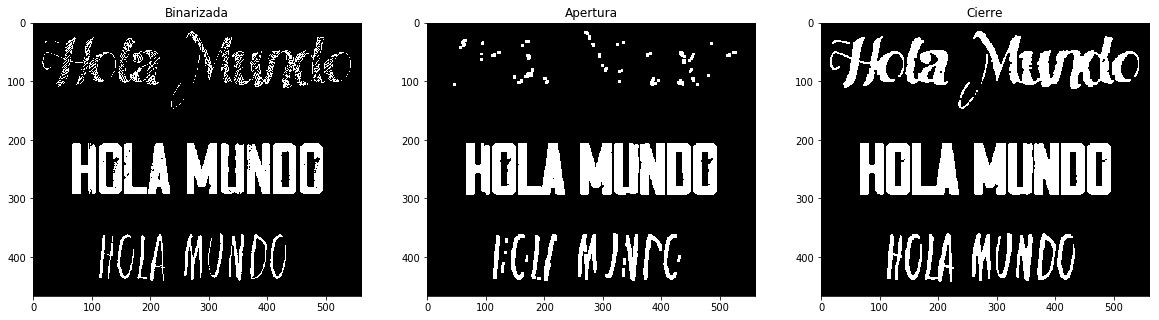

In [49]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_apertura*255, 'gray'),plt.title('Apertura')
plt.subplot(133),plt.imshow(img_cierre*255, 'gray'),plt.title('Cierre')
plt.show()

Kernel tache

In [50]:
img_dilatada = DilatarImagen(img_binarizada, kernel=kernel_tache, itera=2)
img_erosionada = ErosionImagen(img_binarizada, kernel=kernel_tache, itera=2)
img_apertura = AperturaImagen(img_binarizada, kernel=kernel_tache, itera=2)
img_cierre = CierreImagen(img_binarizada, kernel=kernel_tache, itera=2)

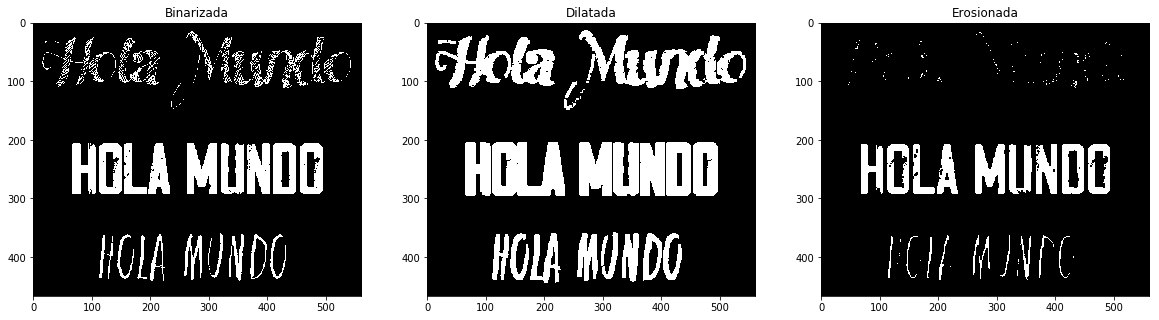

In [51]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_dilatada*255, 'gray'),plt.title('Dilatada')
plt.subplot(133),plt.imshow(img_erosionada*255, 'gray'),plt.title('Erosionada')
plt.show()

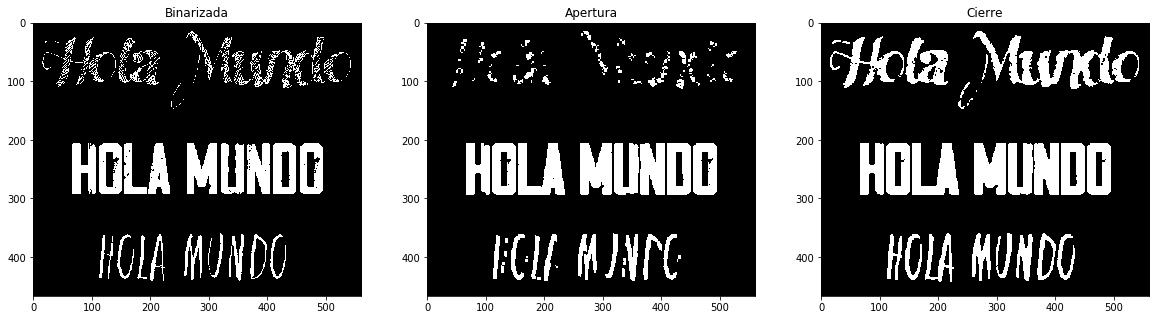

In [52]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_apertura*255, 'gray'),plt.title('Apertura')
plt.subplot(133),plt.imshow(img_cierre*255, 'gray'),plt.title('Cierre')
plt.show()

La erosión por sí sola ayuda al segundo tipo de letra ya que lo adelgaza y se nota más el hueco de la A, y la dilatación ayuda a los otros dos.

La operación de cierre funciona para los tres tipos ya que resalta el blanco sobre el negro, favoreciendo al primero y tercero tipo de letra. La operación de apertura no funciona para el primero y tercero tipo de letra porque pierden calidad, pero favorece al segundo tipo de letra porque resalta el hueco de la A.

Como puede ser difícil entender lo que escribí, lo hice tabla. Las $\bigstar$ representan cuando es favorable.

|Letra|Dilatación|Erosión   |Apertura  |Cierre     |
|:---:|:--------:|:--------:|:--------:|:---------:|
|1    |$\bigstar$|          |          |$\bigstar$ |
|2    |          |$\bigstar$|$\bigstar$|$\bigstar$ |
|3    |$\bigstar$|          |          |$\bigstar$ |

Para el tipo de letra uno le va mejor el kernel cuadrado, para el dos le va mejor el de tache y el tercero le van bien todos.

### Silueta 1

In [53]:
img = cv2.imread('silueta1.jpg', 0)
img_binarizada = Binarizar(img, 70)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f246aeb6d30>,
 Text(0.5,1,'Binarizada'))

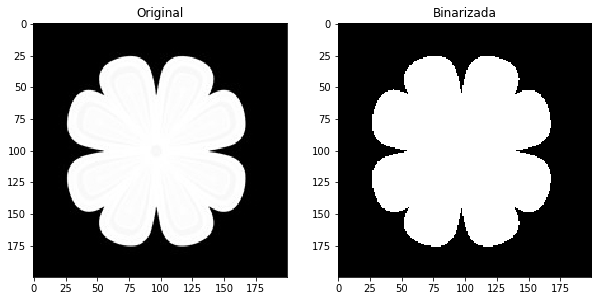

In [54]:
figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img, 'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(img_binarizada*255, 'gray'),plt.title('Binarizada')

Kernel cruz

In [55]:
img_dilatada = DilatarImagen(img_binarizada, kernel=kernel_cruz, itera=10)
img_erosionada = ErosionImagen(img_binarizada, kernel=kernel_cruz, itera=10)
img_apertura = AperturaImagen(img_binarizada, kernel=kernel_cruz, itera=10)
img_cierre = CierreImagen(img_binarizada, kernel=kernel_cruz, itera=10)

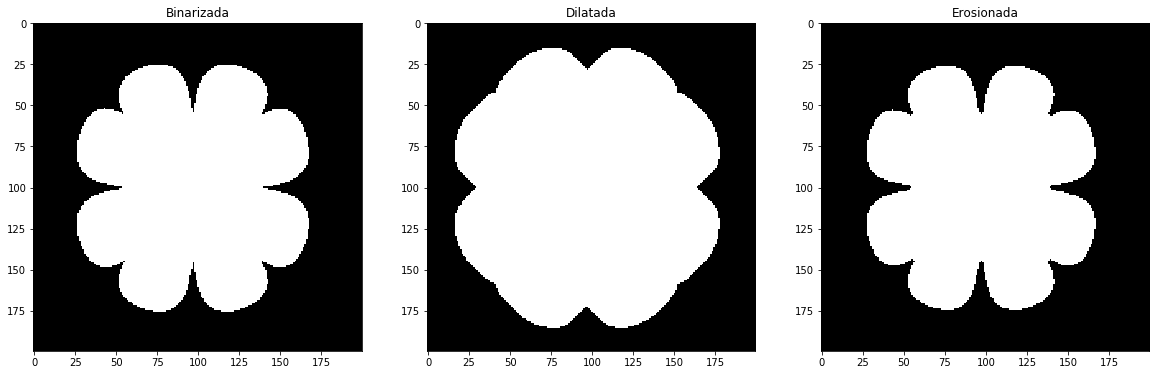

In [56]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_dilatada*255, 'gray'),plt.title('Dilatada')
plt.subplot(133),plt.imshow(img_erosionada*255, 'gray'),plt.title('Erosionada')
plt.show()

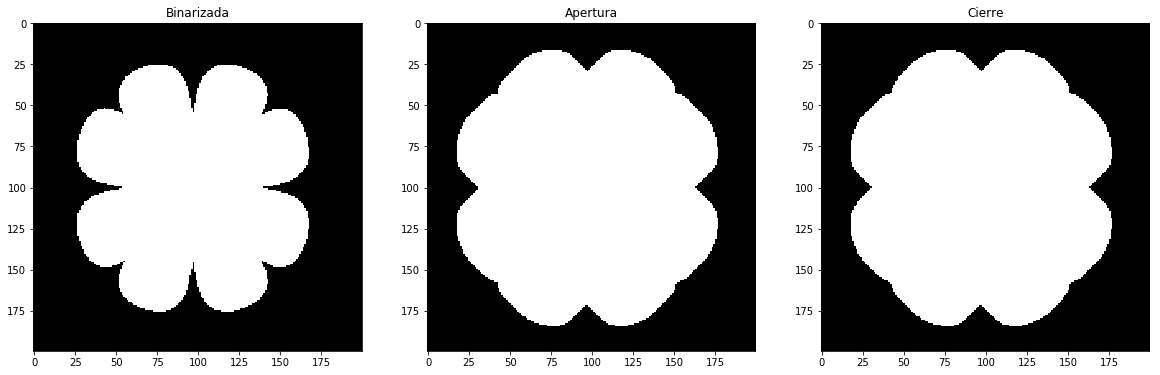

In [57]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_apertura*255, 'gray'),plt.title('Apertura')
plt.subplot(133),plt.imshow(img_cierre*255, 'gray'),plt.title('Cierre')
plt.show()

Kernel cuadrado

In [58]:
img_dilatada = DilatarImagen(img_binarizada, kernel=kernel_cuadrado, itera=10)
img_erosionada = ErosionImagen(img_binarizada, kernel=kernel_cuadrado, itera=10)
img_apertura = AperturaImagen(img_binarizada, kernel=kernel_cuadrado, itera=10)
img_cierre = CierreImagen(img_binarizada, kernel=kernel_cuadrado, itera=10)

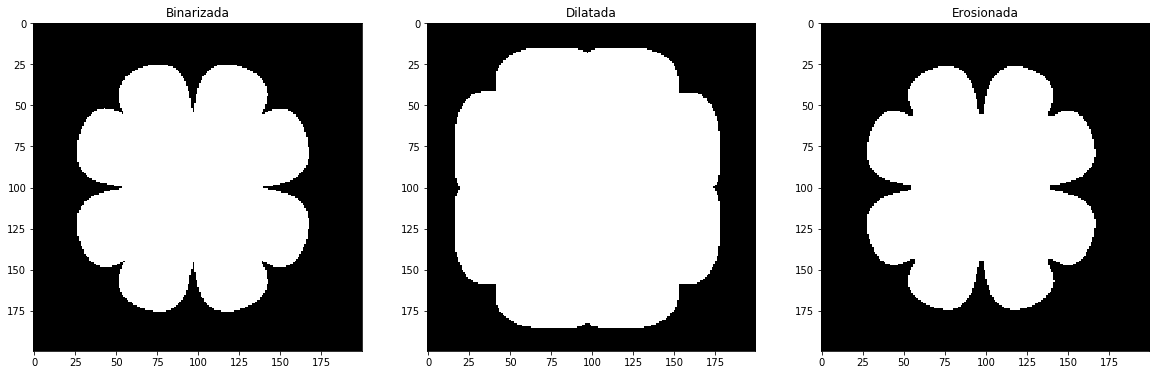

In [59]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_dilatada*255, 'gray'),plt.title('Dilatada')
plt.subplot(133),plt.imshow(img_erosionada*255, 'gray'),plt.title('Erosionada')
plt.show()

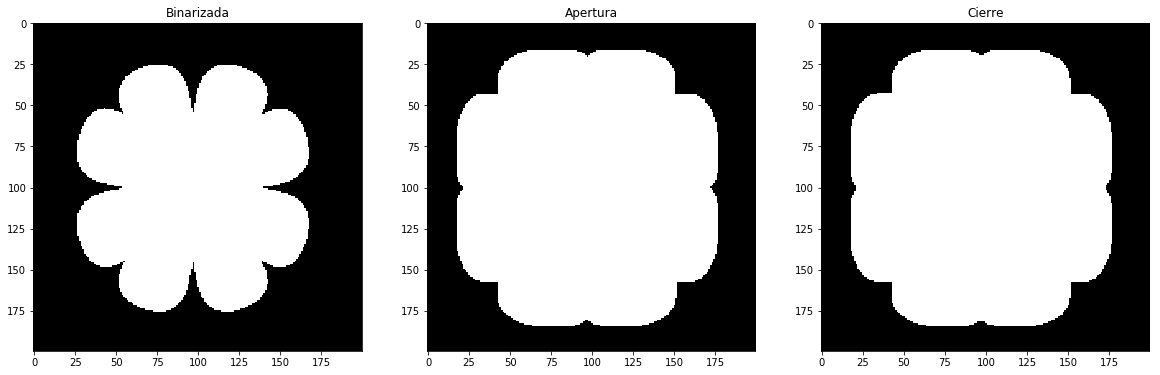

In [60]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_apertura*255, 'gray'),plt.title('Apertura')
plt.subplot(133),plt.imshow(img_cierre*255, 'gray'),plt.title('Cierre')
plt.show()

Kernel tache

In [61]:
img_dilatada = DilatarImagen(img_binarizada, kernel=kernel_tache, itera=10)
img_erosionada = ErosionImagen(img_binarizada, kernel=kernel_tache, itera=10)
img_apertura = AperturaImagen(img_binarizada, kernel=kernel_tache, itera=10)
img_cierre = CierreImagen(img_binarizada, kernel=kernel_tache, itera=10)

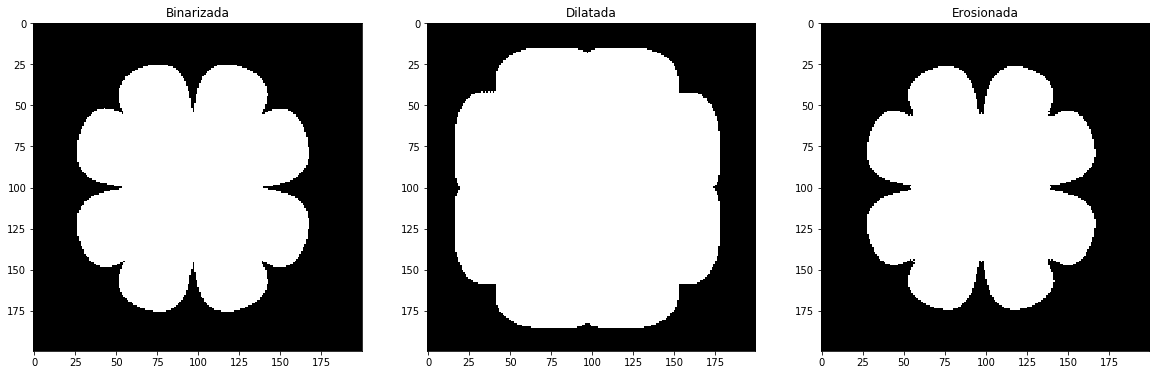

In [62]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_dilatada*255, 'gray'),plt.title('Dilatada')
plt.subplot(133),plt.imshow(img_erosionada*255, 'gray'),plt.title('Erosionada')
plt.show()

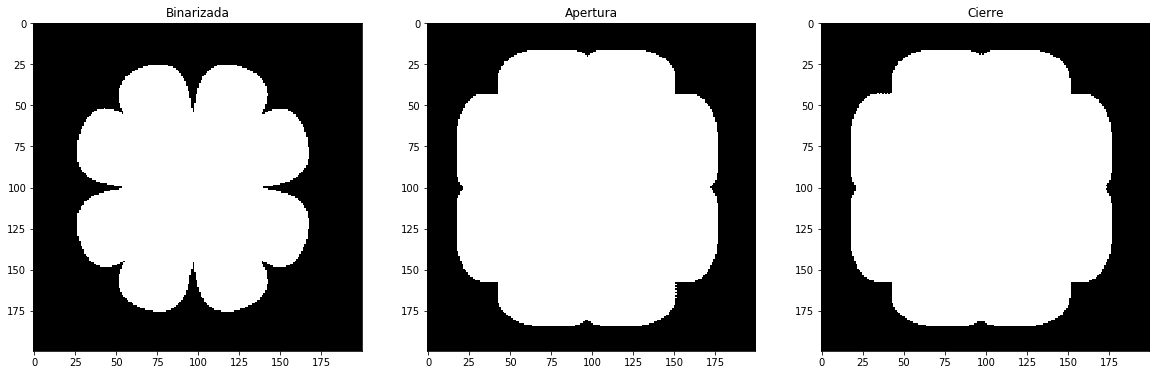

In [63]:
figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(img_binarizada, 'gray'),plt.title('Binarizada')
plt.subplot(132),plt.imshow(img_apertura*255, 'gray'),plt.title('Apertura')
plt.subplot(133),plt.imshow(img_cierre*255, 'gray'),plt.title('Cierre')
plt.show()

La imagen erosionada se ve mejor al dar más definición dentre los pétalos de la flor y dilatada pierde forma. 

Como en esta imagen está bien definido el blanco del negro, o sea, no hay ruido en la imagen, dilatación, apertura y cierre dan resultados similares y no favorables para la figura.

Los kernel son indiferentes a esta figura, todos funcionan igual.

# Conclusiones

Al elegir el tipo de operación que se le quiere aplicar a la imagen se debe tener en cuenta qué tipo de imagen se tiene (si tiene ruido o no), qué resultado se quiere obtener (ensanchar o adelgazar la figura) y qué patron de comportamiento se desea tener (figura del kernel). Tomando esto en cuenta y con la experimentación antes mostrada, llegué a la comclusión de cuando usar cada operación:
1. Dilatación funciona cuando necesitas conectar figuras, ensancharlas, aumentarlas de tamaño o disminuir la cantidad de ruido negro.
2. Erosión funciona cuando necesitas separar figuras, adelgazarlas, disminuirlas en tamaño o disminuir la cantidad de ruido blanco.
3. Apertura funciona cuando necesitas disminuir la cantidad de ruido blanco sin perder el tamaño original de las figuras importantes.
4. Cierre funciona cuando necesitas disminuir la cantidad de ruido negro sin perder el tamaño original de las figuras importantes.

Respecto a la figura del kernel, no hay reglas que se puedan seguir, su elección se basa más en la experimentación.
Al usar kernel diferente se puden obtener resultados diferentes, un ejemplo resaltante es la imagen de cuadros. Cuando se dilata la imagen de cuadros con el kernel de cruz se pierde la forma cuadradada y se convierte a circular (impide que los pixeles de las esquinas sean replicados), con el kernel cuadrado se respeta la figura cuadrada y con el kernel de _tache_ se deforma de los costados mostrando picos.

# Referencias

 1. Montiel González, Carlos. (2020). Procesamiento digital de imágenes. [Blog]. Accedido de https://classroom.google.com/c/MTYxNjI3NzE3ODUy
 1. Transformaciones Morfológicas. (2018). Accesado 9 de enero de 2021, de https://unipython.com/transformaciones-morfologicas/